# Quick test 1

In [1]:
using ForneyLab       # based on last official release
using LinearAlgebra
using Plots
using PyPlot
using ProgressMeter
using Compat
using WAV
using Base64
using FileIO
using HDF5
using FLAC
using DSP
using LAR
using LAR.AR
using LAR.DataAR

using FFTW


include("functions/auxiliary/buffer.jl")
include("functions/auxiliary/audioplayer.jl")
include("functions/auxiliary/workflow.jl")
include("functions/auxiliary/fourier.jl")
include("functions/auxiliary/warpedfilter.jl")
;

## Load signal

In [2]:
# specify desired sampling frequency
fs_desired = 16000

# load and process drilling sound
x_speech, fs_speech = wavread("data/obama.wav", format="native")
fs_speech = Int(fs_speech)
x_speech = x_speech[20*fs_speech+1:23*fs_speech]
x_speech = resample(x_speech, fs_desired/fs_speech)
x_speech = 100*x_speech/var(x_speech)

# specify time axis
t = collect((1:length(x_speech))/fs_desired)

# create plots of {drill, speech, combined}
audioplayers(x_speech, fs=fs_desired)
;

<source src="data:audio/wav;base64,UklGRjzuAgBXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQDuAgAypPY8sSRHvtF5g75IkCW+v7YtvXxdgj1Ic6Y9+05PvfsD9L0ikXu9gh23vZ0HJb6fN3++RVuFvox8+r0VO+w8wbt7vCreCr1xcgM7xhBZvIEnXzzf0iU7uYgGvj+iC74JBhK9he+iPZ34Cj6Y5No9zjmBPcbm+DzYcB09eWhvPBP2Vr1yqKi9Xm4vvBuEXj3B4rU9SN1TPTceUDwDgDi9XRyFvawAEr2Pjsa7fg7NvOGTIj2udRU+seY9Ph3JZj5OPB0+Xe9VvZ/aZr5olG89bFs1OtvWgT3K0Fs+f38zPhDr4z1Oi1k+MJuJPdlVPr7r3S6+acXgvQvgFrwe1Jo8ZeDSOwDoCL512Qq+QdKUvQnJ/b1dOTm+FyZyvgpweL5bXcK96BJ7u+TdL73tqha81IwWPf3JLD1MsMs9DaDkPPcXAL5PQAe+6XNqvfOU8zyNxIk9TpXYPc6Gkz1gCGg9gTeuPdNRMz2o0SO9n1mJvR/zQb32awC6yGZZPZ2k/DwRl/q5ySv2vAcNirwwCKm7uG5JPE1lkDt17ns9e4/qPbOpKj6u/FA+xBEXPnnTab0tEM29aRfSPXeeezueeRg+k9EyPsIroz3u09c93TtVPmd58LwesR2+ZrEEvg40ur22+Pu7zBVFPdWPNL2jnjC+oEneva7eeL0Mva+9RA/cvb/kKr7Mtj++gdhRvVzWLDw7bTO9YoYjvXcju7yH5fg8YnaYPfauubyfkQe+wV4gvqTujL0dcT09XS2GPfFQoz222M09BsHuPSMPBz66vME9DW/XugbmZb2NDhe9Hie5u1MNEjzckCC8JM87va2pf71CGeu8p1GGOw6h+zxJ0Sc9GhP2PVG9Fz7Mez8+0flIPmQ09z1tSgK+IQSkvC08Ez1k/qk7Ygk5PugX0T2rjyc9hXkePjtDCT5v+N69+qK+vUtnG779fbm9+EEDPUqqBz3qX9y9EOkKvjEa1r2wPcO9+a21vV2e8r3y2C++Xu3/vWaARLyfWCK9yBaGvaVhV71BpUC9jLswPE6oYTwL3mO9adDqvb5Ey736Niy8QmmXPTfUsz1Nz+o96YrRPUo15j1tz/49yQoFPVh1Y73EA4K9+OBlvWXZCr2XJU+7n9NvvEQP/ry+V4a7SIkSuy2cBz165ME92eLVPYcRDD7J1xE+ixAlPuq4Fj4V/5g9CJfgvSg3xLxULh+9YeGyPT8lMz627bo9Ni3HPcIuGT5nxIA9i8wDvZ336L3mMEy+3mAGvYA/BD2mZjW8QiyrvYusA75F7ca91ks+vZpbkL2gvRS+oNYmvoLs9L3ZYx+9vmJbvZISt71rgq29eV5rvbJmQjzSG108MqZvvbKi4r0xBYu9j/0RvEgVlj3SGck9dhqiPdA4bj2pYJo99VEsPakszLwjgZW9w+2tvbVmMr3xSK07tqS7PK11gTtOf5o8ZPxLPfCIRD1U9U496bNNPWBvqz0dPwg+alQRPoTmBD4zGwQ+6nyTPQvSTLzbgok8rCqXvBSH3D1WHh4+2FLyPWxc0T0uVLE9L0tePF17uLymBvm9nSI1vm68kr34z+u8a936u4CZT70D3Ni9YtVvvSKw0byiyzy9gsibvV9uDr6angC+1HFivbwHwb2Opqy9UcynvWRTQr3CbxQ88c28O7csk70B/9W9dVK2vc9c5rzdeQw9L4cnPbY2bD2ChHY94CtmPUBj9Dz4WQS9lK2CvdXCPr1OvMC8lLWGPG9zzDxqLfo7SJcPPZUMgj3bIZo9iaROPWie3zxdhko9Ho/XPcxM5j2NU/49TP62PUahnD2OuCY93ClDPVN5tTzfVXs9+eqcPYiUlT3pu4Y9MRbePPM/5brAAQG90R9+vU5Ner1E14m8HShsvKYEejwm75E8PQD9ul+rlLyFzAa99dIRvR6fVb3dbny9GuOKvSqNq73dgNu9oqi1vS4pbb3HwHG7WFIRPethzDwZvwa9EKZqvU/wjL1Hs169re4cvfrKKr04ZtW8//Gju/XcUzzVRju8YxsxvQPoM710R/W8ZGviu22rBzycFBq8660Xu6rm4zx+gBQ9imINPdK/tzy9A128JrQWvNPjozzlRdo8GFXWPN+N+jxdBBI9ccbgPLMQtDyH+Ca6Yo+AvBV7VzuGxxo9S4BRPbZsYz0tCSY9GNoiPeMbIT3xezs924BoPUbbOD2RYN0896D0POq/zzwluaQ8tXBGuOQpOLwIjaq7T4FFu0pluDuCX1E7UBEwvLRUGLvMYrA8ox+rPKnYnzzIc5c6Q8IAvW+8iL3JfH69zB2OvWc6s70EWpy9BZKqvU2Bcr3yBM28m5yKvPQiD73M3Ry93dgOvYbHAb3zxdK8PT+ZvFMr3ryRZv28MCuqvOcy+bww1fu8HOjnvKf1qrzm4qi8/fLIvEgVwLwkg9m8BlO7vMoNMbwgjTI8NoeRO7EwlzyM48c81SHPPI689DzOqQ49yl98PVlKjD2WIUY9VKsYPS6DDz1Anyo9o+VsPXbAUj32dCY9YhVgPbWCQz21+FQ9Q/JmPRQFVT0NXyc9eitAPc1kRj1LkCA98zUUPebjiDtpJIS89v/WvCtPvrxx9SK9XVBLvYXpbr130lW9JVgrvWbt7rz302e8jnhwvGg0R7x0wSe8+X2fvB5i/rx+3wS9tlF0vUD9Rr2YHhC9M2/CvNybiLyvbki8km0+vAoFFLzda225tOLXuztSmbxnEsG8pOuSvEAm1LwjuCK9XDAwvXDQQL1QYTe9aNuyvGyIObt6QOQ7WPFwO1Kg5rs5cKQ6NKJWPKFrrzxxK5k8aKmhPCNsAD3uGnA92jBsPVO5UT06Apo9KOmPPb5Mmz2X55o915CEPbozYz3a6Bg91Kv6PGiZrjzUk+c8i1iuPALk6Dsj1/y7K/h1O5derLol+Cy7ZmpuPMjiGzy7AZU74LVTu8rIB7zbUbC8H1y9vBtt/bxGMNm8URgTvc3QCb1/axa9XiMOvXSA5bxU2+i8+juLvEgzWrzzEoa81+3xvHLrDb35jTq9h8VEvXWoEr3fUs+8XrJdvMvvS7zf0IO7USeeuzb+cLzbZtq86bL7vDyFAr3Huhq95+JQvTkzdr3DEDq9Q52wvK8vOLzoh+I6TCy0PMIbBj1K9hI9GX4zPfJ4aT26V2I9zg9RPRQHRj16bzo9WxYxPf3WKD3l3b48KEePPPaEyzy8Q/s8rcHyPJSQEj0sDxI9QD+hPJ6PljznMiQ9yzQxPcGwvTxfpkE8h9GuPKRY3Dxs39M8jUzXO9xscbztXoO8GjOju5eMLLthn6a80HFJvVdheb0Vx2i9kO4tvSb2Cb3ro0S9sgE9vaWuEb2USlW8+qQuPPEUeDyjM8A7xks9vEoIk7w/Bgy9xrcuvT+4N717CiG9l7Y3vRMBBL05tbC8FfkUvdgi27w7xAK8Tc1Mu6Mw1bs3wRe84SKQvGQbQLzXvgy7b6BLPHyfV7s+RJu7XfscORNqFDyD9Lo8bDZmPP8/XDzFBMU8UnKEPSCelD0LmZw9qi+UPY0vaD3cc1Q9eLA2PRN7AT1qAUs80adQug6DGryWhra7FsckPAa2mzyKSI48QuOQPOZpVTzXGhw81QHrO+QdO7ucrEC8NWOVvJzwk7z5wT68UT6eO1jd27vi9ni8W8dUvDOwHbyStGu8uivDvD3kNr0naTS9faXYvOokabz7oOG7hWcauwaaHjzf4Bw8Vu6nPPHwgTxnxzq8fLYMvTKLHL1oJWK9HzdcvdAnQ70on2+92S12vemjYb3mNAG9QpqMvB4VdrtugAk8aRFjPE5wGz1frWs960hKPUwzOD0VvDY9w+kwPXHYMT2/QjE9uF3DPBwH1DzFdSk96Po1PZHnHz1Gq

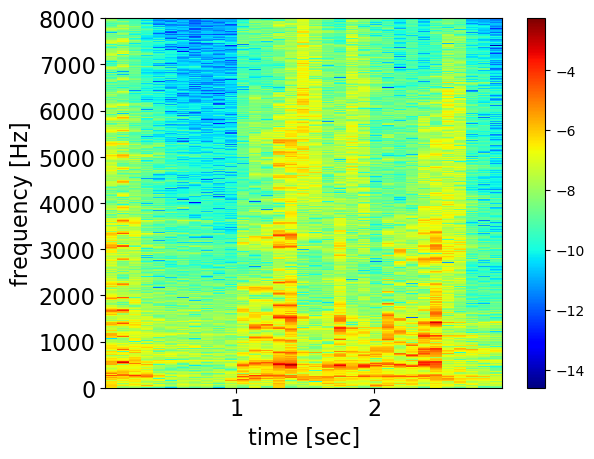

In [3]:
spec = spectrogram(x_speech, convert(Int, 100e-3*fs_desired), convert(Int, 10e-3*fs_desired), fs=fs_desired)
plot_spectrogram(spec, fs_desired);

In [4]:
# specify order and pole
order = 32
z = 0.5756

# initialize Y
Y = zeros(order*3,1)

# initialize memory struct for Y
taps_all = Array{Array{Float64,1}}(undef, length(x_speech))
Sap = Array{Complex{Float64},2}(undef, length(x_speech), order)

# get update matrices
T, u = allpass_update_matrix(order, z)

# perform updating
for k = 1:length(x_speech)
    
    Y, taps_all[k] = allpass_update(x_speech[k], Y, order, z, T=T, u=u)

    Sap[k,:] = FFTW.fft(taps_all[k])
    
end
Sapr = real(Sap)
Sapi = imag(Sap)
;

In [5]:
audioplayers(x_speech, [taps_all[k][32] for k=1:length(x_speech)], fs=fs_desired)

<source src="data:audio/wav;base64,UklGRjzuAgBXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQDuAgAypPY8sSRHvtF5g75IkCW+v7YtvXxdgj1Ic6Y9+05PvfsD9L0ikXu9gh23vZ0HJb6fN3++RVuFvox8+r0VO+w8wbt7vCreCr1xcgM7xhBZvIEnXzzf0iU7uYgGvj+iC74JBhK9he+iPZ34Cj6Y5No9zjmBPcbm+DzYcB09eWhvPBP2Vr1yqKi9Xm4vvBuEXj3B4rU9SN1TPTceUDwDgDi9XRyFvawAEr2Pjsa7fg7NvOGTIj2udRU+seY9Ph3JZj5OPB0+Xe9VvZ/aZr5olG89bFs1OtvWgT3K0Fs+f38zPhDr4z1Oi1k+MJuJPdlVPr7r3S6+acXgvQvgFrwe1Jo8ZeDSOwDoCL512Qq+QdKUvQnJ/b1dOTm+FyZyvgpweL5bXcK96BJ7u+TdL73tqha81IwWPf3JLD1MsMs9DaDkPPcXAL5PQAe+6XNqvfOU8zyNxIk9TpXYPc6Gkz1gCGg9gTeuPdNRMz2o0SO9n1mJvR/zQb32awC6yGZZPZ2k/DwRl/q5ySv2vAcNirwwCKm7uG5JPE1lkDt17ns9e4/qPbOpKj6u/FA+xBEXPnnTab0tEM29aRfSPXeeezueeRg+k9EyPsIroz3u09c93TtVPmd58LwesR2+ZrEEvg40ur22+Pu7zBVFPdWPNL2jnjC+oEneva7eeL0Mva+9RA/cvb/kKr7Mtj++gdhRvVzWLDw7bTO9YoYjvXcju7yH5fg8YnaYPfauubyfkQe+wV4gvqTujL0dcT09XS2GPfFQoz222M09BsHuPSMPBz66vME9DW/XugbmZb2NDhe9Hie5u1MNEjzckCC8JM87va2pf71CGeu8p1GGOw6h+zxJ0Sc9GhP2PVG9Fz7Mez8+0flIPmQ09z1tSgK+IQSkvC08Ez1k/qk7Ygk5PugX0T2rjyc9hXkePjtDCT5v+N69+qK+vUtnG779fbm9+EEDPUqqBz3qX9y9EOkKvjEa1r2wPcO9+a21vV2e8r3y2C++Xu3/vWaARLyfWCK9yBaGvaVhV71BpUC9jLswPE6oYTwL3mO9adDqvb5Ey736Niy8QmmXPTfUsz1Nz+o96YrRPUo15j1tz/49yQoFPVh1Y73EA4K9+OBlvWXZCr2XJU+7n9NvvEQP/ry+V4a7SIkSuy2cBz165ME92eLVPYcRDD7J1xE+ixAlPuq4Fj4V/5g9CJfgvSg3xLxULh+9YeGyPT8lMz627bo9Ni3HPcIuGT5nxIA9i8wDvZ336L3mMEy+3mAGvYA/BD2mZjW8QiyrvYusA75F7ca91ks+vZpbkL2gvRS+oNYmvoLs9L3ZYx+9vmJbvZISt71rgq29eV5rvbJmQjzSG108MqZvvbKi4r0xBYu9j/0RvEgVlj3SGck9dhqiPdA4bj2pYJo99VEsPakszLwjgZW9w+2tvbVmMr3xSK07tqS7PK11gTtOf5o8ZPxLPfCIRD1U9U496bNNPWBvqz0dPwg+alQRPoTmBD4zGwQ+6nyTPQvSTLzbgok8rCqXvBSH3D1WHh4+2FLyPWxc0T0uVLE9L0tePF17uLymBvm9nSI1vm68kr34z+u8a936u4CZT70D3Ni9YtVvvSKw0byiyzy9gsibvV9uDr6angC+1HFivbwHwb2Opqy9UcynvWRTQr3CbxQ88c28O7csk70B/9W9dVK2vc9c5rzdeQw9L4cnPbY2bD2ChHY94CtmPUBj9Dz4WQS9lK2CvdXCPr1OvMC8lLWGPG9zzDxqLfo7SJcPPZUMgj3bIZo9iaROPWie3zxdhko9Ho/XPcxM5j2NU/49TP62PUahnD2OuCY93ClDPVN5tTzfVXs9+eqcPYiUlT3pu4Y9MRbePPM/5brAAQG90R9+vU5Ner1E14m8HShsvKYEejwm75E8PQD9ul+rlLyFzAa99dIRvR6fVb3dbny9GuOKvSqNq73dgNu9oqi1vS4pbb3HwHG7WFIRPethzDwZvwa9EKZqvU/wjL1Hs169re4cvfrKKr04ZtW8//Gju/XcUzzVRju8YxsxvQPoM710R/W8ZGviu22rBzycFBq8660Xu6rm4zx+gBQ9imINPdK/tzy9A128JrQWvNPjozzlRdo8GFXWPN+N+jxdBBI9ccbgPLMQtDyH+Ca6Yo+AvBV7VzuGxxo9S4BRPbZsYz0tCSY9GNoiPeMbIT3xezs924BoPUbbOD2RYN0896D0POq/zzwluaQ8tXBGuOQpOLwIjaq7T4FFu0pluDuCX1E7UBEwvLRUGLvMYrA8ox+rPKnYnzzIc5c6Q8IAvW+8iL3JfH69zB2OvWc6s70EWpy9BZKqvU2Bcr3yBM28m5yKvPQiD73M3Ry93dgOvYbHAb3zxdK8PT+ZvFMr3ryRZv28MCuqvOcy+bww1fu8HOjnvKf1qrzm4qi8/fLIvEgVwLwkg9m8BlO7vMoNMbwgjTI8NoeRO7EwlzyM48c81SHPPI689DzOqQ49yl98PVlKjD2WIUY9VKsYPS6DDz1Anyo9o+VsPXbAUj32dCY9YhVgPbWCQz21+FQ9Q/JmPRQFVT0NXyc9eitAPc1kRj1LkCA98zUUPebjiDtpJIS89v/WvCtPvrxx9SK9XVBLvYXpbr130lW9JVgrvWbt7rz302e8jnhwvGg0R7x0wSe8+X2fvB5i/rx+3wS9tlF0vUD9Rr2YHhC9M2/CvNybiLyvbki8km0+vAoFFLzda225tOLXuztSmbxnEsG8pOuSvEAm1LwjuCK9XDAwvXDQQL1QYTe9aNuyvGyIObt6QOQ7WPFwO1Kg5rs5cKQ6NKJWPKFrrzxxK5k8aKmhPCNsAD3uGnA92jBsPVO5UT06Apo9KOmPPb5Mmz2X55o915CEPbozYz3a6Bg91Kv6PGiZrjzUk+c8i1iuPALk6Dsj1/y7K/h1O5derLol+Cy7ZmpuPMjiGzy7AZU74LVTu8rIB7zbUbC8H1y9vBtt/bxGMNm8URgTvc3QCb1/axa9XiMOvXSA5bxU2+i8+juLvEgzWrzzEoa81+3xvHLrDb35jTq9h8VEvXWoEr3fUs+8XrJdvMvvS7zf0IO7USeeuzb+cLzbZtq86bL7vDyFAr3Huhq95+JQvTkzdr3DEDq9Q52wvK8vOLzoh+I6TCy0PMIbBj1K9hI9GX4zPfJ4aT26V2I9zg9RPRQHRj16bzo9WxYxPf3WKD3l3b48KEePPPaEyzy8Q/s8rcHyPJSQEj0sDxI9QD+hPJ6PljznMiQ9yzQxPcGwvTxfpkE8h9GuPKRY3Dxs39M8jUzXO9xscbztXoO8GjOju5eMLLthn6a80HFJvVdheb0Vx2i9kO4tvSb2Cb3ro0S9sgE9vaWuEb2USlW8+qQuPPEUeDyjM8A7xks9vEoIk7w/Bgy9xrcuvT+4N717CiG9l7Y3vRMBBL05tbC8FfkUvdgi27w7xAK8Tc1Mu6Mw1bs3wRe84SKQvGQbQLzXvgy7b6BLPHyfV7s+RJu7XfscORNqFDyD9Lo8bDZmPP8/XDzFBMU8UnKEPSCelD0LmZw9qi+UPY0vaD3cc1Q9eLA2PRN7AT1qAUs80adQug6DGryWhra7FsckPAa2mzyKSI48QuOQPOZpVTzXGhw81QHrO+QdO7ucrEC8NWOVvJzwk7z5wT68UT6eO1jd27vi9ni8W8dUvDOwHbyStGu8uivDvD3kNr0naTS9faXYvOokabz7oOG7hWcauwaaHjzf4Bw8Vu6nPPHwgTxnxzq8fLYMvTKLHL1oJWK9HzdcvdAnQ70on2+92S12vemjYb3mNAG9QpqMvB4VdrtugAk8aRFjPE5wGz1frWs960hKPUwzOD0VvDY9w+kwPXHYMT2/QjE9uF3DPBwH1DzFdSk96Po1PZHnHz1Gq

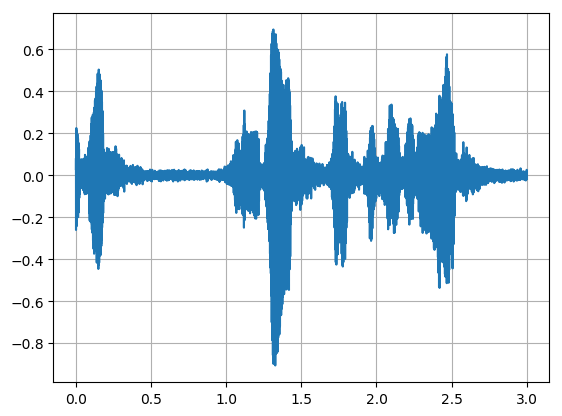

In [6]:
plt.plot(t,x_speech)
plt.grid()

## Calculate spectrum

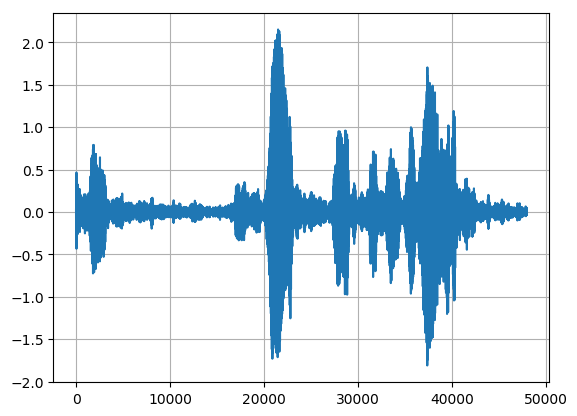

In [7]:
plt.plot(Sapr[:,11])
plt.grid()
#plt.xlim(10000,10100)

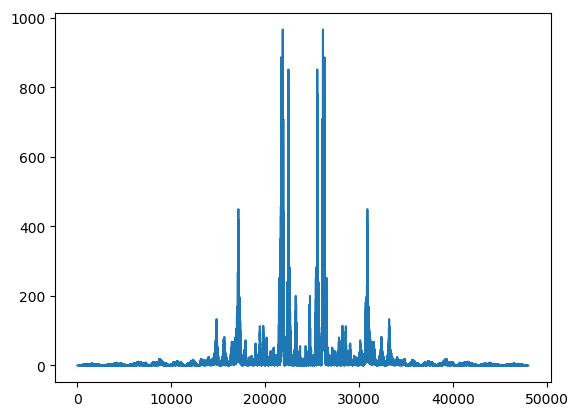

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000060A5AF28>

In [8]:
# check whether AR prior can be used
plt.plot(FFTW.fftshift(abs.(FFTW.fft(Sapr[:,11]))))

## Inference

In [9]:
# parameters
AR_order = 50
iterations = 3
Λ_meas = 1e10
bin = 11 

# create factor graphs
fg = FactorGraph()

# AR node
@RV γ ~ ForneyLab.Gamma(placeholder(:a_γ), placeholder(:b_γ))
@RV θ ~ GaussianMeanPrecision(placeholder(:μ_θ, dims=(AR_order,)), placeholder(:Λ_θ, dims=(AR_order, AR_order)))
@RV Sprev ~ GaussianMeanPrecision(placeholder(:μ_Sprev, dims=(AR_order,)), placeholder(:Λ_Sprev, dims=(AR_order, AR_order)))
@RV S ~ LAR.AR.Autoregressive(θ, Sprev, γ)

# selection and input
d = zeros(AR_order)
d[1] = 1
@RV x ~ DotProduct(d, S)
@RV v ~ GaussianMeanPrecision(0, Λ_meas)
@RV y = x + v
placeholder(y, :y)

#ForneyLab.draw(fg, external_viewer=:default)

Variable(:y, Edges:
Edge belonging to variable y: ( addition_1.i[out] )----( placeholder_y.i[out] ).
)

In [10]:
# recognition factorization
q = RecognitionFactorization(θ, S, Sprev, γ, ids=[:Θ :S :Sprev :γ])
algo = compatibility_fix(variationalAlgorithm(q))
#Falgo = freeEnergyAlgorithm()
eval(Meta.parse(algo));
#eval(Meta.parse(Falgo));

In [11]:
current_a_γ = 0.001
current_b_γ = 0.001
current_Λ_θ = tiny*diagm(randn(AR_order))
current_μ_θ = randn(AR_order)
current_μ_Sprev = randn(AR_order)
current_Λ_Sprev = tiny*diagm(randn(AR_order))
F_tot = []
a_γ_tot = []
b_γ_tot = []
μ_S_tot = []
Λ_S_tot = []
μ_θ_tot = []
Λ_θ_tot = []
μ_pred = Float64[]

p = Progress(length(Sapr[:,bin]), 1, "Observed ")
marginals = Dict()

#marginals[:S] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=zeros(AR_order), w=tiny*Ic(AR_order))
#marginals[:Sprev] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=zeros(AR_order), w=tiny*Ic(AR_order))
for sr in 1:length(Sapr[:,bin])
    update!(p, sr)
    marginals[:θ] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=current_μ_θ, w=current_Λ_θ)
    marginals[:γ] = ProbabilityDistribution(Univariate, Gamma, a=current_a_γ, b=current_b_γ)
    marginals[:Sprev] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=current_μ_Sprev, w=current_Λ_Sprev)
    for it = 1:iterations
        
        data = Dict(:y => Sapr[sr,bin],
                    :μ_Sprev => current_μ_Sprev,
                    :Λ_Sprev => current_Λ_Sprev,
                    :μ_θ => current_μ_θ,
                    :Λ_θ => current_Λ_θ,
                    :a_γ => current_a_γ,
                    :b_γ => current_b_γ)
        data, marginals = step_all!(data, marginals)
        #push!(F_tot, freeEnergy(data, marginals))      
        push!(a_γ_tot, marginals[:γ].params[:a])
        push!(b_γ_tot, marginals[:γ].params[:b])
        push!(μ_S_tot, ForneyLab.unsafeMean(marginals[:S])[1])
        push!(Λ_S_tot, ForneyLab.unsafePrecision(marginals[:S])[1])
        push!(μ_θ_tot, ForneyLab.unsafeMean(marginals[:θ]))
        push!(Λ_θ_tot, ForneyLab.unsafePrecision(marginals[:θ]))
        
        
        current_μ_θ = ForneyLab.unsafeMean(marginals[:θ])
        current_Λ_θ = ForneyLab.unsafePrecision(marginals[:θ])
        current_a_γ = marginals[:γ].params[:a]
        current_b_γ = marginals[:γ].params[:b]
        current_μ_Sprev = ForneyLab.unsafeMean(marginals[:S])
        current_Λ_Sprev = ForneyLab.unsafePrecision(marginals[:S])
    end
    push!(μ_pred, sum(current_μ_Sprev.*current_μ_θ))
    
end

Observed 100%|██████████████████████████████████████████| Time: 0:17:143:06m


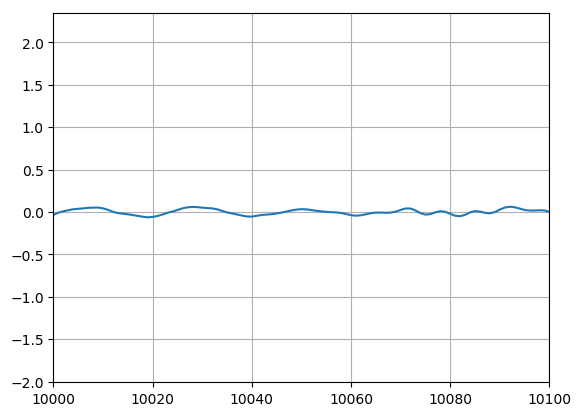

In [12]:
plt.plot(Sapr[:,bin])
plt.xlim(10000,10100)
plt.grid()

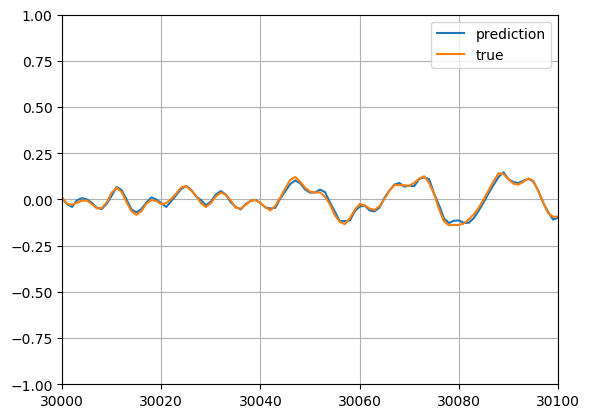

In [13]:
plt.plot(μ_pred, label="prediction")
plt.plot(Sapr[2:end,bin], label="true")
plt.legend()
plt.xlim(30000, 30100)
plt.ylim(-1,1)
plt.grid()

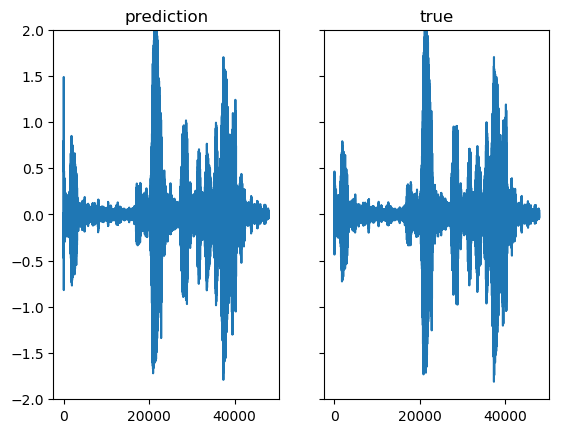

(-2, 2)

In [14]:
# error
fig, ax = plt.subplots(ncols=2, sharey=true)
ax[1].plot(μ_pred[1:end-1])
ax[2].plot(Sapr[:,bin])
ax[1].set_title("prediction")
ax[2].set_title("true")
plt.ylim(-2, 2)

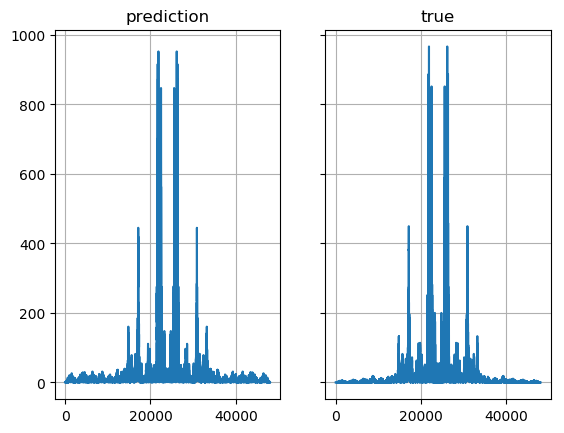

In [15]:
# FFT of prediction
fig, ax = plt.subplots(ncols=2, sharey=true)
ax[1].plot(FFTW.fftshift(abs.(FFTW.fft(μ_pred[1:end-1]))))
ax[2].plot(FFTW.fftshift(abs.(FFTW.fft(Sapr[:,bin]))))
ax[1].set_title("prediction")
ax[2].set_title("true")
ax[1].grid()
ax[2].grid()
#plt.ylim(-1, 1)

In [16]:
# process noise precision


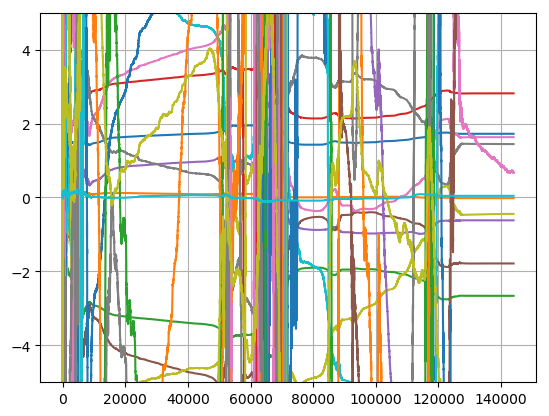

(-5, 5)

In [17]:
for ki = 1:AR_order
    plt.plot([μ_θ_tot[k][ki] for k=1:length(μ_θ_tot)])
end
plt.grid()
plt.ylim(-5, 5)

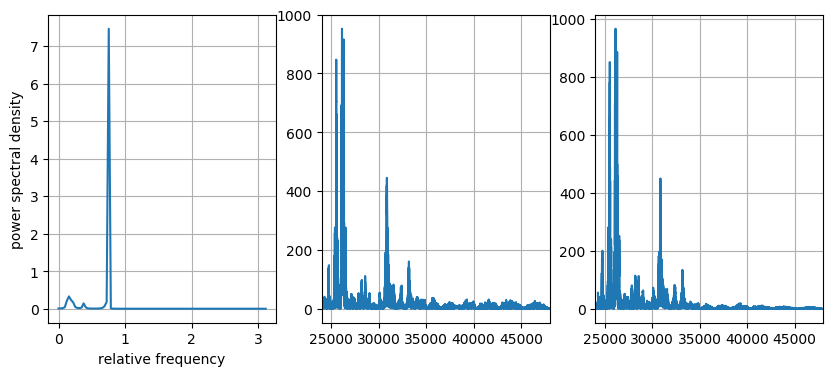

In [18]:
theta = 0:pi/100:pi
pn_var = 1/((current_a_γ-1)/current_b_γ) # mode of gamma
psd = pn_var ./(abs.([sum(-append!([-1.], μ_θ_tot[end]).*exp.(-collect(0:AR_order)*1im.*th)) for th in theta]).^2)
#psd = 1 ./(abs.(1+0im.-μ_θ_tot[end][1]*exp.(-1im*theta)-μ_θ_tot[end][2]*exp.(-2im*theta)).^2)
_, ax = plt.subplots(ncols=3, figsize=(10,4))
ax[1].plot(theta, psd)
ax[1].grid()
ax[1].set_xlabel("relative frequency")
ax[1].set_ylabel("power spectral density")
ax[2].plot(FFTW.fftshift(abs.(FFTW.fft(μ_pred[1:end-1]))))
ax[2].set_xlim(24000, 48000)
ax[2].grid()
ax[3].plot(FFTW.fftshift(abs.(FFTW.fft(Sapr[:,bin]))))
ax[3].set_xlim(24000, 48000)
ax[3].grid()
